# **Predicting Binary Classes in Molecular Data Using Machine Learning**

## Brief summary
This project presents a machine learning pipeline for classifying molecular records into binary classes (Positive / Negative), using a dataset of 7,832 samples and 103 biochemical and statistical features. Following the general CRISP-DM process [1], the goal is to compare multiple classifiers and select the best-performing model based on metrics such as F1-score, MCC, and AUC.

## 1. Exploratory Data Analysis (EDA)
We perform exploratory data analysis to understand the dataset’s structure, distributions, class balance, outliers, correlations, and overall data quality. Several common Python packages and techniques are used to streamline the analysis [2].

In [1]:
# Pip install whatever needed
!pip3 install scikit-learn pandas numpy xgboost

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import sklearn

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Import functions and classes for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Import classifiers for building models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Import classes for label encoding and model evaluation
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, f1_score, matthews_corrcoef, roc_curve
from sklearn.model_selection import cross_val_score

# Import classes for model selection
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Import classes for creating pipelines
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# # Set up our Notebook environment
%matplotlib inline

In [3]:
# Load the dataset
df = pd.read_csv('df.csv')

In [4]:
# Display all the columns and five rows
pd.set_option('display.max_columns', None)
df.head()

,feat_seq_entropy,feat_C_atoms,feat_H_atoms,feat_N_atoms,feat_O_atoms,feat_S_atoms,feat_molecular_weight,feat_Perc_Tiny,feat_Perc_Small,feat_Perc_Aliphatic,feat_Perc_Aromatic,feat_Perc_NonPolar,feat_Perc_Polar,feat_Perc_Charged,feat_Perc_Basic,feat_Perc_Acidic,feat_PP1,feat_PP2,feat_PP3,feat_KF1,feat_KF2,feat_KF3,feat_KF4,feat_KF5,feat_KF6,feat_KF7,feat_KF8,feat_KF9,feat_KF10,feat_Z1,feat_Z2,feat_Z3,feat_Z4,feat_Z5,feat_F1,feat_F2,feat_F3,feat_F4,feat_F5,feat_F6,feat_T1,feat_T2,feat_T3,feat_T4,feat_T5,feat_VHSE1,feat_VHSE2,feat_VHSE3,feat_VHSE4,feat_VHSE5,feat_VHSE6,feat_VHSE7,feat_VHSE8,feat_ProtFP1,feat_ProtFP2,feat_ProtFP3,feat_ProtFP4,feat_ProtFP5,feat_ProtFP6,feat_ProtFP7,feat_ProtFP8,feat_ST1,feat_ST2,feat_ST3,feat_ST4,feat_ST5,feat_ST6,feat_ST7,feat_ST8,feat_BLOSUM1,feat_BLOSUM2,feat_BLOSUM3,feat_BLOSUM4,feat_BLOSUM5,feat_BLOSUM6,feat_BLOSUM7,feat_BLOSUM8,feat_BLOSUM9,feat_BLOSUM10,feat_MSWHIM1,feat_MSWHIM2,feat_MSWHIM3,feat_Perc_A,feat_Perc_C,feat_Perc_D,feat_Perc_E,feat_Perc_F,feat_Perc_G,feat_Perc_H,feat_Perc_I,feat_Perc_K,feat_Perc_L,feat_Perc_M,feat_Perc_N,feat_Perc_P,feat_Perc_Q,feat_Perc_R,feat_Perc_S,feat_Perc_T,feat_Perc_V,feat_Perc_W,feat_Perc_Y,Class
0,2.840224,83,163,21,41,0,2111.31,0.200000,0.266667,0.133333,0.133333,0.266667,0.733333,0.400000,0.266667,0.133333,0.396000,-0.200667,0.125333,-0.040667,0.255333,-0.088000,0.608667,0.300667,-0.724000,0.170667,-0.253333,-0.218000,0.064667,0.776000,0.247333,-0.797333,-0.521333,0.182667,-0.527933,0.159333,0.150067,0.321000,-0.066800,0.207333,-3.299333,0.871333,-0.178000,-0.039333,0.316667,-0.444667,0.348000,0.214667,0.123333,0.180000,0.196667,0.215333,-0.092667,-2.194000,1.770000,-0.403333,0.544000,-0.350667,0.292000,0.339333,0.461333,-0.643933,-0.011867,-0.055200,-0.152733,0.076067,0.207200,-0.006467,0.215267,0.436000,0.054000,-0.479333,-0.194667,0.216667,0.090000,-0.150000,-0.130000,0.268667,-0.185333,-0.187333,0.384000,-0.182000,0.000000,0.000000,0.066667,0.066667,0.000000,0.000000,0.000000,0.000000,0.266667,0.133333,0.000000,0.000000,0.000000,0.133333,0.000000,0.133333,0.066667,0.000000,0.000000,0.133333,Negative
1,2.923231,73,149,21,40,0,1961.08,0.400000,0.533333,0.266667,0.066667,0.333333,0.666667,0.133333,0.066667,0.066667,0.110667,-0.328000,0.048000,-0.164000,-0.200667,0.169333,0.246667,-0.301333,-0.342667,0.269333,-0.351333,0.140667,-0.172000,0.203333,-0.504667,-0.607333,-0.912000,0.382000,-0.069667,0.141333,-0.121867,0.510333,0.096000,0.121467,-4.541333,0.259333,0.373333,0.226000,0.654667,-0.124667,-0.081333,-0.120000,-0.330667,-0.083333,-0.072667,-0.070667,-0.135333,-0.682000,-0.292000,-0.851333,0.514000,0.142667,-0.121333,0.144667,0.234000,-0.850800,-0.364800,-0.392133,-0.097067,0.137467,-0.106733,0.009333,-0.011933,0.162000,-0.313333,-0.252000,0.048000,0.120000,0.350667,-0.071333,-0.569333,0.014667,-0.049333,-0.314000,0.566667,-0.444000,0.066667,0.000000,0.000000,0.066667,0.066667,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.133333,0.000000,0.066667,0.066667,0.066667,0.266667,0.000000,0.000000,0.000000,Negative
2,3.106891,81,150,20,39,0,2028.18,0.133333,0.266667,0.200000,0.200000,0.466667,0.533333,0.466667,0.200000,0.266667,0.022000,-0.273333,-0.188667,-0.240667,0.014667,-0.461333,0.172667,0.022000,-0.430000,0.226667,0.480667,0.174667,0.118667,0.412667,-0.130667,-0.291333,-0.553333,0.154000,-0.214000,0.187600,0.012467,0.388533,-0.091800,-0.361267,-3.853333,0.414000,-0.128000,-0.005333,0.540667,-0.117333,0.104667,-0.066000,0.232667,-0.374667,-0.055333,0.482000,-0.186000,-1.130667,0.082000,-0.484000,-0.602667,-0.604000,0.595333,-0.098667,-0.080667,-0.742000,-0.104333,-0.021533,-0.133933,-0.084000,0.109733,0.087400,0.445000,0.288667,0.117333,-0.243333,0.056667,-0.186000,0.207333,-0.143333,0.306667,0.104667,-0.128667,-0.044667,0.164000,-0.308667,0.000000,0.000000,0.133333,0.133333,0.133333,0.133333,0.066667,0.066667,0.133333,0.133333,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Positive
3,2.840224,66,1

In [5]:
num_observations = df.shape[0]
num_variables = df.shape[1]

print(f"Number of observations: {num_observations}")
print(f"Number of variables: {num_variables}")

Number of observations: 7832
Number of variables: 103


- The dataset contains 7832 rows and 103 columns

In [6]:
# Determine the data types of the feature columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7832 entries, 0 to 7831
Columns: 103 entries, feat_seq_entropy to Class
dtypes: float64(97), int64(5), object(1)
memory usage: 6.2+ MB


- The columns include 97 of type 'float64', 5 of type 'int64', and 1 of type 'object'

In [7]:
# Find column with dtype 'object'
object_column = df.dtypes[df.dtypes == 'object'].index.tolist()

print("Column with dtype 'object':", object_column)

Column with dtype 'object': ['Class']


In [8]:
# Check the class balance
class_balance = df['Class'].value_counts(normalize=True)

print("Class Balance:")
print(class_balance)

Class Balance:
Class
Negative    0.675179
Positive    0.324821
Name: proportion, dtype: float64


- 'Class' has 2 unique values: 'Negative' and 'Positive'
- About 67% of the instances are labeled as 'Negative' and only 33% as 'Positive'
- This will be addressed later using SMOTE

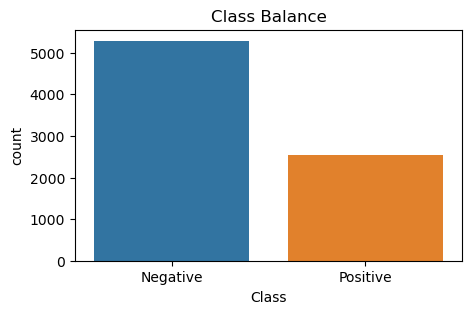

In [9]:
# Visualize the distribution of the target variable
plt.figure(figsize=(5, 3))
sns.countplot(x='Class', data=df)
plt.title('Class Balance')
plt.show()

- Bar plot shows the distribution of the 'Class' column

In [10]:
# Detect missing values and sort in descending order
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values)

feat_seq_entropy    0
feat_ST5            0
feat_BLOSUM7        0
feat_BLOSUM6        0
feat_BLOSUM5        0
                   ..
feat_Z3             0
feat_Z2             0
feat_Z1             0
feat_KF10           0
Class               0
Length: 103, dtype: int64


In [11]:
print(f'The number of missing values: {df.isnull().sum().sum()}')

The number of missing values: 0


- There are no missing values in the DataFrame 'df'. This means that all 7832 entries across all 103 columns are complete, with no 'NaN' entries.

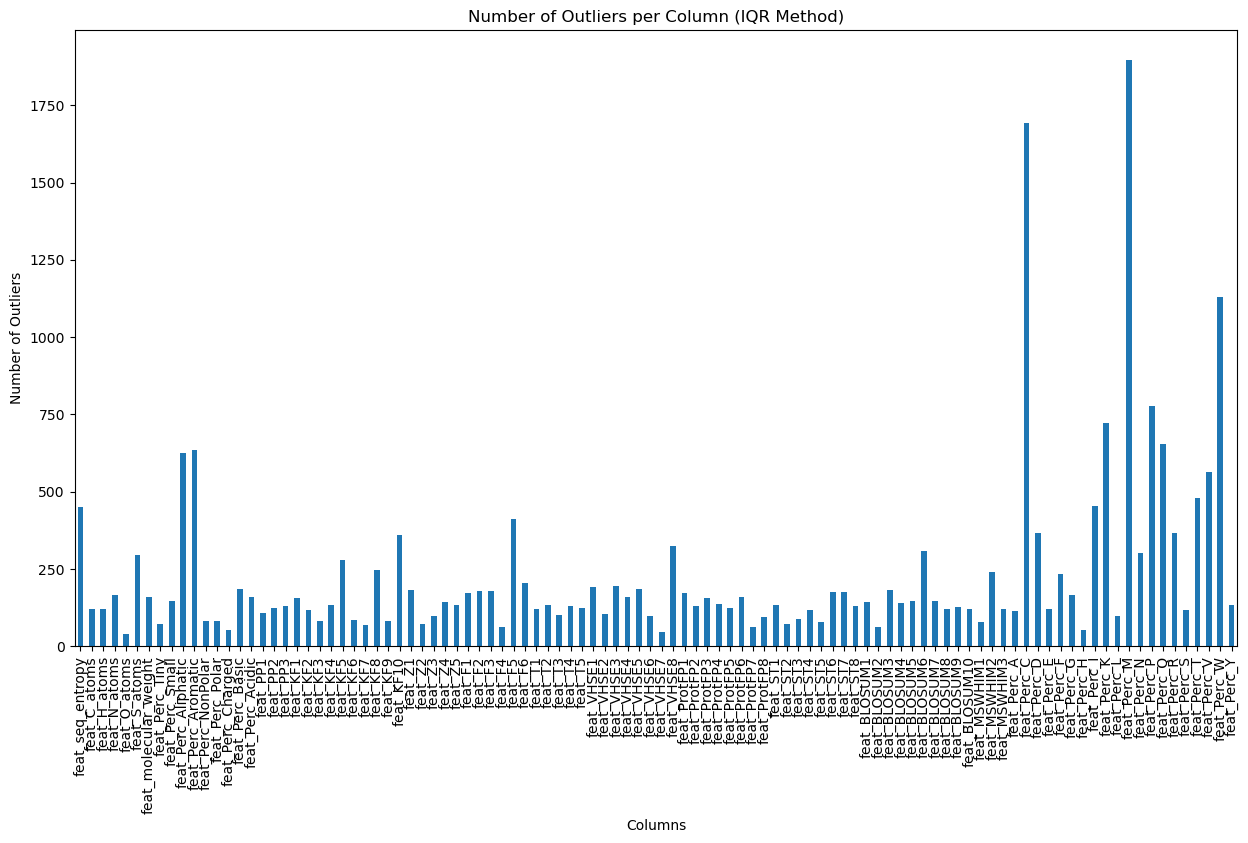

In [12]:
# Calculate IQR and identify outliers
df_numerical_columns = df.drop(columns=['Class'])
Q1 = df_numerical_columns.quantile(0.25)
Q3 = df_numerical_columns.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((df_numerical_columns < (Q1 - 1.5 * IQR)) | (df_numerical_columns > (Q3 + 1.5 * IQR))).sum()

# Plot a bar chart of the number of outliers per column
plt.figure(figsize=(15, 8))
outliers.plot(kind='bar')
plt.title('Number of Outliers per Column (IQR Method)')
plt.xlabel('Columns')
plt.ylabel('Number of Outliers')
plt.show()

- The bar chart shows that many columns in the DataFrame have a large number of outliers, with some columns having over 1750 outliers, indicating significant variability and potential anomalies in the data
- These outliers will be addressed in the subsequent steps

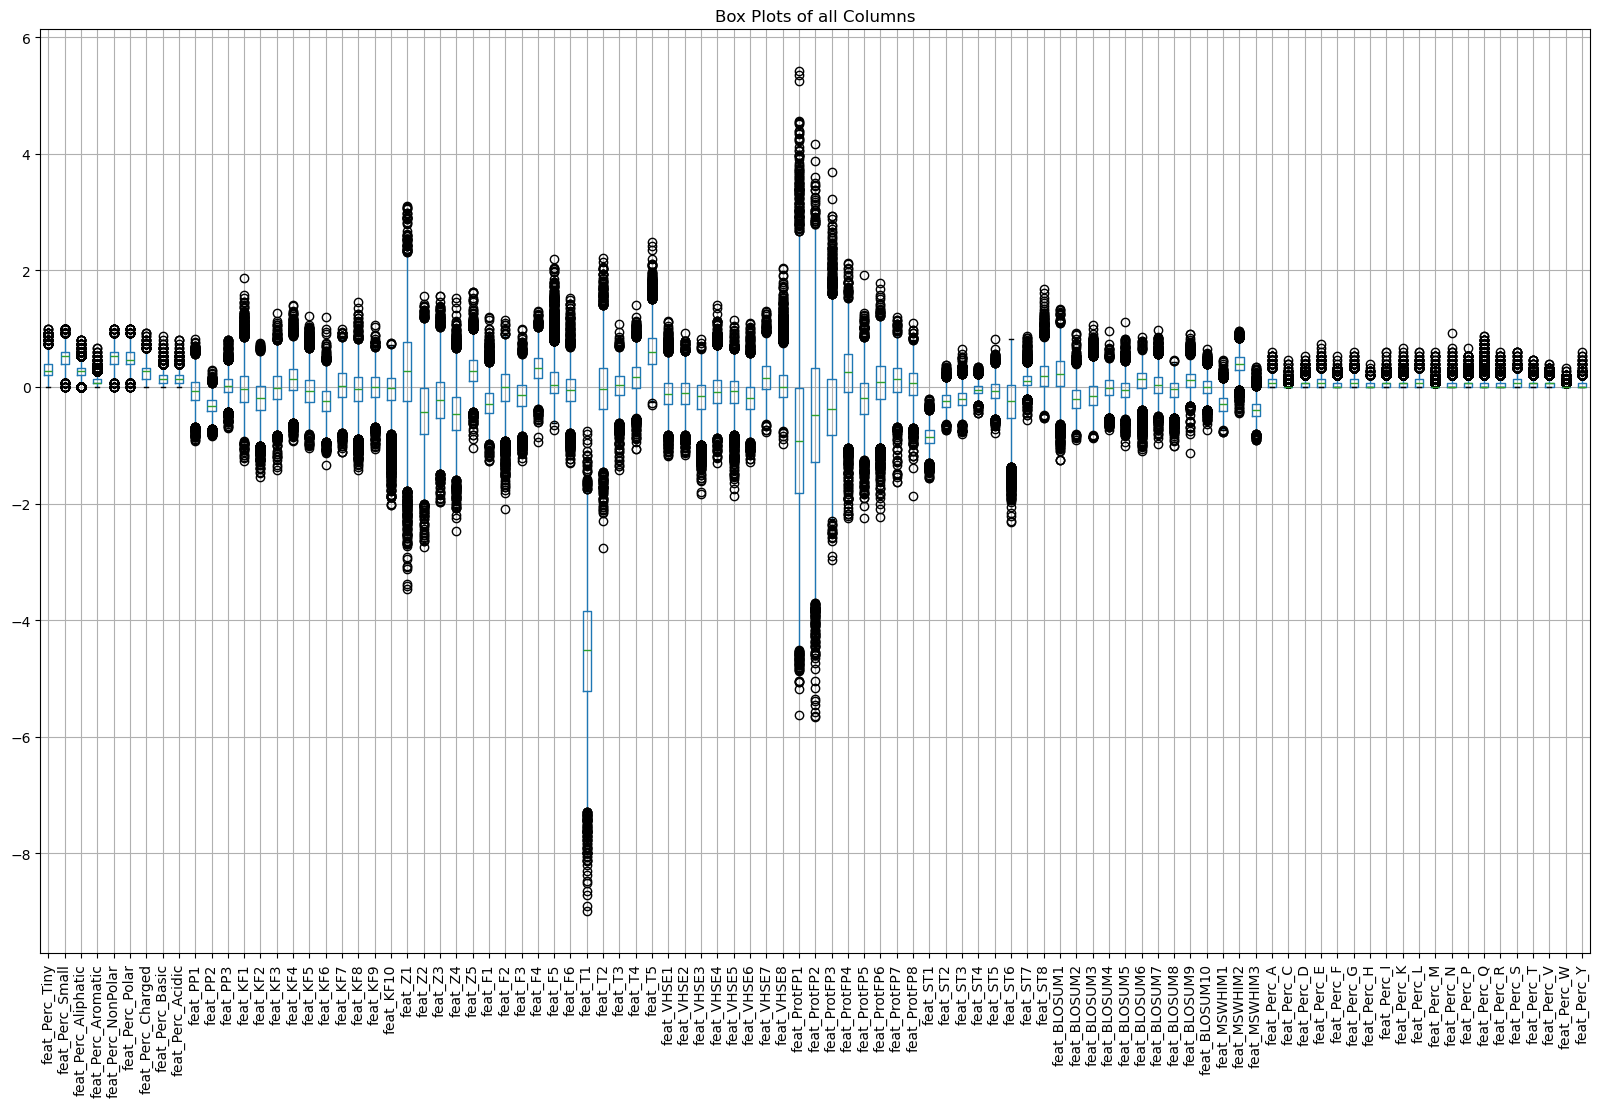

In [13]:
# Plot box plots for some columns

def plot_boxplots(df):
    plt.figure(figsize=(20, 12))
    df.boxplot(rot=90)
    plt.title('Box Plots of all Columns')
    plt.show()

df_some_columns = df_numerical_columns.iloc[:,7:]
plot_boxplots(df_some_columns)

- The box plot shows that many columns have a lot of outliers, which means there are many extreme values in the dataset

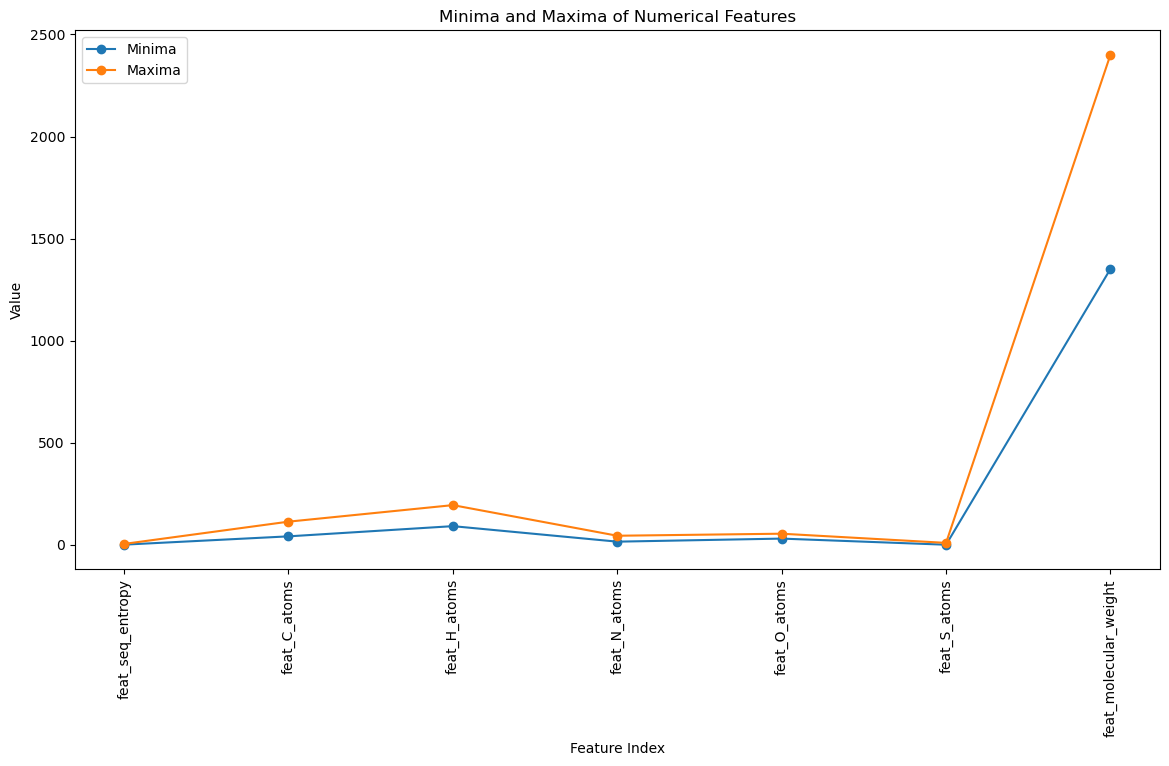

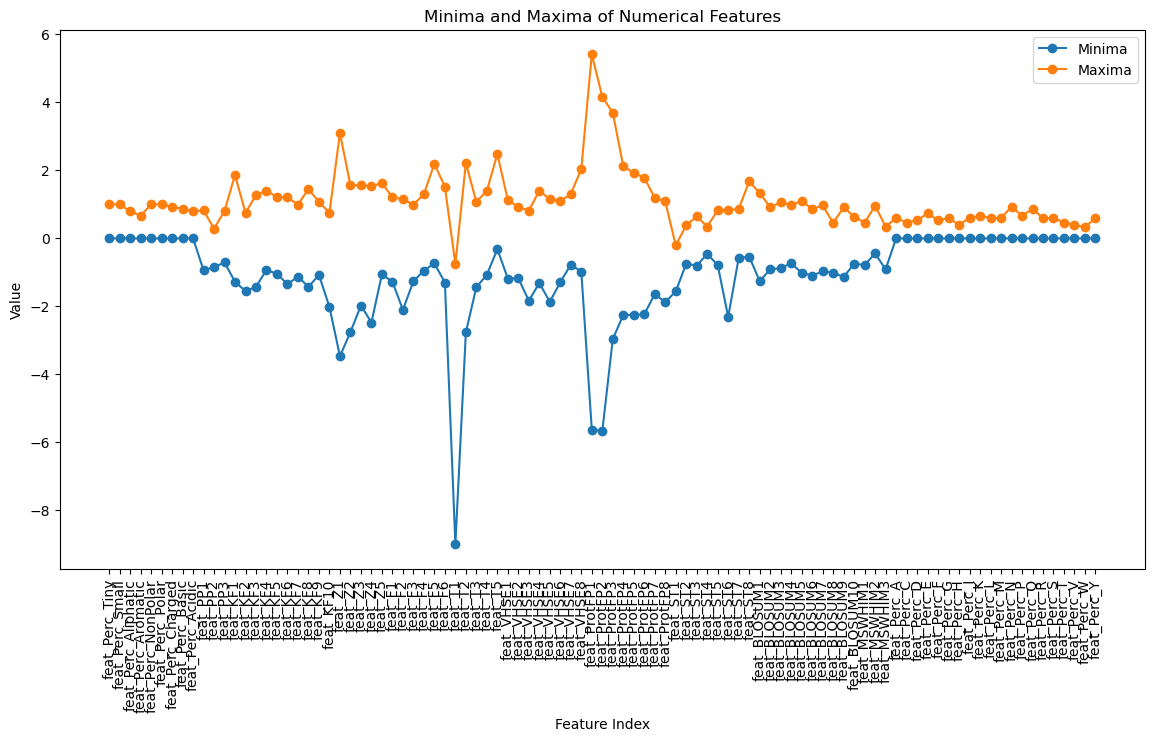

In [14]:
# Check the scale of numerical features

# Define a function for plotting minima and maxima
def plot_minima_maxima(minima, maxima):
    plt.figure(figsize=(14, 7))
    plt.plot(minima, '-o', label='Minima')
    plt.plot(maxima, '-o', label='Maxima')
    plt.xlabel('Feature Index')
    plt.ylabel('Value')
    plt.title('Minima and Maxima of Numerical Features')
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

# Calculate minima and maxima
minima = df_numerical_columns.min()
maxima = df_numerical_columns.max()

# Plot minima and maxima
plot_minima_maxima(minima[:7], maxima[:7])
plot_minima_maxima(minima[7:], maxima[7:])

- The line plots show the range of values for each feature in the dataset, with some features having values ranging from 0 to over 2500, while others have values between -10 and 10.

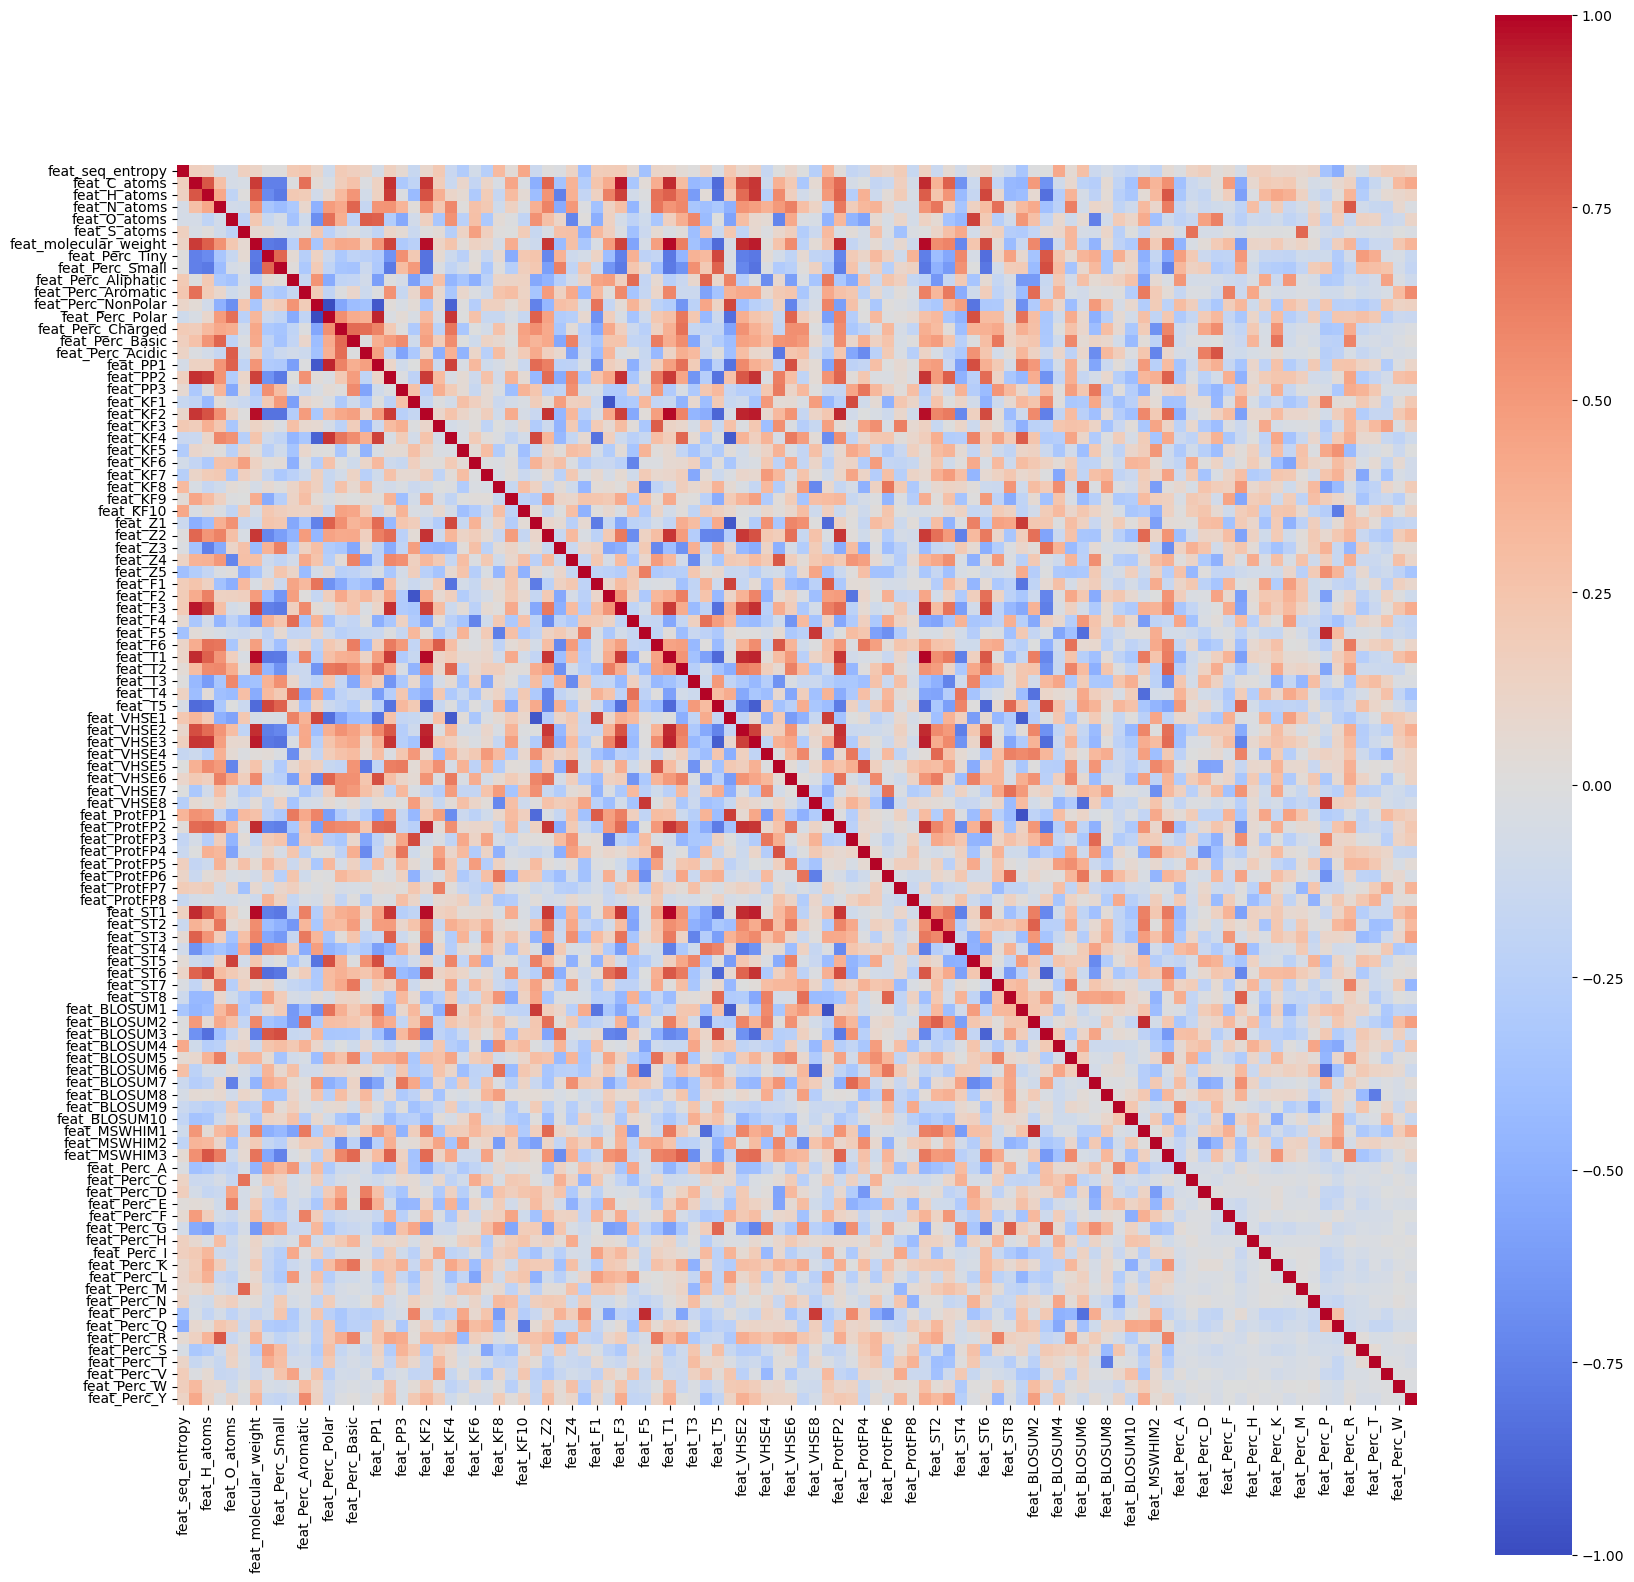

In [15]:
# Correlation matrix and heatmap
corr_matrix = df_numerical_columns.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', square=True);
plt.show()

- The correlation matrix heatmap help in understanding how different features in the data relate to each other

- Strong Positive Correlation (Red):
    - Some features increase together
    - For example, if 'feat_C_atoms' and 'feat_H_atoms' are dark red, it means more carbon atoms usually come with more hydrogen atoms

- Strong Negative Correlation (Blue):
    - Some features move in opposite directions
    - For example, if 'feat_O_atoms' and 'feat_molecular_weight' are dark blue, it means more oxygen atoms might mean a lower molecular weight

- No Correlation (White/Light Colors):
    - Some features don't affect each other
    - For example, if 'feat_seq_entropy' and 'feat_BLOSUM1' are white, it means changes in sequence entropy don't predict changes in BLOSUM1
  
- Clusters of Similar Colors:
    - Groups of features behave similarly
    - For example, if 'feat_Z1', 'feat_Z2', and 'feat_Z3' are all red, it means these features tend to increase together.

- In conclusion, the correlation matrix heatmap shows that some features in the dataset are strongly related to each other, either positively or negatively, which could be important for further analysis

In [16]:
# Distribution of Numerical Features

# Calculate skewness and kurtosis
skewness = df_numerical_columns.skew()  # Measures the asymmetry of the distribution. A skewness close to 0 indicates a symmetrical distribution
kurtosis = df_numerical_columns.kurtosis()  # Measures the "tailedness" of the distribution. High kurtosis indicates heavy tails

# Categorize distributions based on skewness and kurtosis
distribution_categories = {}

for col in df_numerical_columns.columns:
    if abs(skewness[col]) < 0.5 and kurtosis[col] < 3:
        distribution_categories[col] = 'Normal'
    elif skewness[col] > 0.5:
        distribution_categories[col] = 'Right-Skewed'
    elif skewness[col] < -0.5:
        distribution_categories[col] = 'Left-Skewed'
    elif kurtosis[col] >= 3:
        distribution_categories[col] = 'Heavy-Tailed'
    else:
        distribution_categories[col] = 'Other'

distribution_categories_df = pd.DataFrame(list(distribution_categories.items()), columns=['Feature', 'Distribution_Type'])

# Check the class balance
distribution_balance = distribution_categories_df['Distribution_Type'].value_counts()


Distribution_Type
Normal          61
Right-Skewed    33
Left-Skewed      8
Name: count, dtype: int64


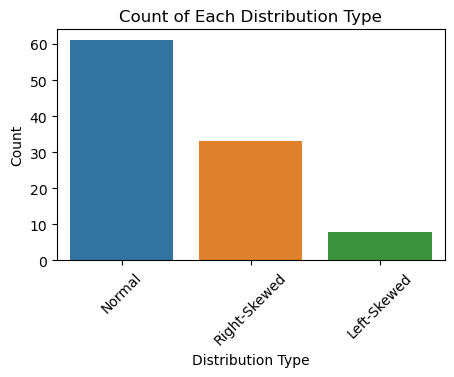

In [17]:
# Count the number of each type of distribution
distribution_counts = distribution_categories_df['Distribution_Type'].value_counts()

# Print the counts
print(distribution_counts)

# Plot a countplot of the distribution types
plt.figure(figsize=(5, 3))
sns.countplot(data=distribution_categories_df, x='Distribution_Type', order=distribution_counts.index)
plt.title('Count of Each Distribution Type')
plt.xlabel('Distribution Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

- The majority of the features follow a normal distribution: These features have values that are evenly spread around a central value (mean)
- Some Features are Right-Skewed: These features have a lot of low values and a few very high values
- A Few Features are Left-Skewed: These features have a lot of high values and a few very low values

- Normal Features: Many statistical methods and models work best with normally distributed data
- Skewed Features: Skewed features might need some adjustments (transformations) to work well with certain models
- Examples of transformations: taking the log of the values or using other mathematical operations to make the data more "normal"
- Use models that can handle skewed data if you don't transform the data. Examples include decision trees and random forests

## 2. Data Preprocessing

We apply a series of preprocessing steps to prepare the dataset for modeling:
- Quantile-based flooring and capping to handle outliers
- Handling missing values (though this dataset has none)
- Scaling features using `StandardScaler`

These steps ensure that the input data is clean, consistent, and suitable for machine learning.

In [18]:
# Split the data: 70% for training, 30% for testing
X = df.drop(columns='Class')
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

# Get the number of observations and variables for the training set
num_observations_train = X_train.shape[0]
num_variables_train = X_train.shape[1]

# Get the number of observations and variables for the test set
num_observations_test = X_test.shape[0]
num_variables_test = X_test.shape[1]

# Display the information
print(f"Training set: {num_observations_train} observations, {num_variables_train} variables")
print(f"Test set: {num_observations_test} observations, {num_variables_test} variables")

Training set: 5482 observations, 102 variables
Test set: 2350 observations, 102 variables


- The dataset has been successfully split into a training set and a test set, with 70% of the data allocated for training and 30% for testing
- The training set comprises 5482 observations and 102 variables, while the test set consists of 2350 observations and 102 variables.

In [19]:
# Check the class balance
y_train_class_balance = y_train.value_counts(normalize=True)
y_test_class_balance = y_test.value_counts(normalize=True)

print("\nTrain Class Balance:")
print(y_train_class_balance)

print("\nTest Class Balance:")
print(y_test_class_balance)


Train Class Balance:
Class
Negative    0.675119
Positive    0.324881
Name: proportion, dtype: float64

Test Class Balance:
Class
Negative    0.675319
Positive    0.324681
Name: proportion, dtype: float64


- The class balance has been calculated for the training set and test set, showing that the class distribution is similar across all sets. This shows the need to address class imbalance in later steps

### Apply Quantile-based Flooring and Capping

Outliers are filtered using the Interquartile Range (IQR) method [3], a standard statistical technique for identifying mild and extreme anomalies. Alternative methods such as Isolation Forest [4] and angle-based detection [5] were also reviewed but not applied.

In [20]:
# Define percentiles for flooring and capping
lower_quantile = 0.01
upper_quantile = 0.99

def count_outliers(X_train):
    # Calculate the values at these percentiles
    lower_bounds = X_train.quantile(lower_quantile)
    upper_bounds = X_train.quantile(upper_quantile)

    # List of columns
    columns = X_train.columns

    # Initialize a DataFrame to count the number of outliers in each row
    outliers_count = pd.Series(0, index=X_train.index)

    # Count the number of outliers in each row for the training set
    for column in columns:
        outliers_count += (X_train[column] < lower_bounds[column]) | (X_train[column] > upper_bounds[column])

    return lower_bounds, upper_bounds, outliers_count

lower_bounds, upper_bounds, outliers_count = count_outliers(X_train)

In [21]:
outliers_count.describe()

count    5482.000000
mean        1.585553
std         3.953672
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        37.000000
dtype: float64

- Quantile-based flooring and capping method was applied to the training dataset using the 1st and 99th percentiles
- The number of outliers per row was counted, showing that many rows have no outliers
- The results show that the average is about 1.59 outliers per row, with some rows having up to 37 outliers

In [22]:
# Set a threshold for the maximum number of allowed outliers per row
threshold = 1

# Filter rows in the training set where the number of outliers is less than the threshold
X_train_wo_outlier = X_train[outliers_count < threshold]
y_train_wo_outlier = y_train[outliers_count < threshold]

print("The shape of X_train:", X_train.shape)
print("The shape of y_train:", y_train.shape)
print("The shape of X_train_wo_outlier:", X_train_wo_outlier.shape)
print("The shape of y_train_wo_outlier:", y_train_wo_outlier.shape)

The shape of X_train: (5482, 102)
The shape of y_train: (5482,)
The shape of X_train_wo_outlier: (3674, 102)
The shape of y_train_wo_outlier: (3674,)


- The training dataset was filtered to remove rows with more than one outlier
- The training set had 5482 rows and 102 columns. After filtering, it now has 3674 rows and 102 columns

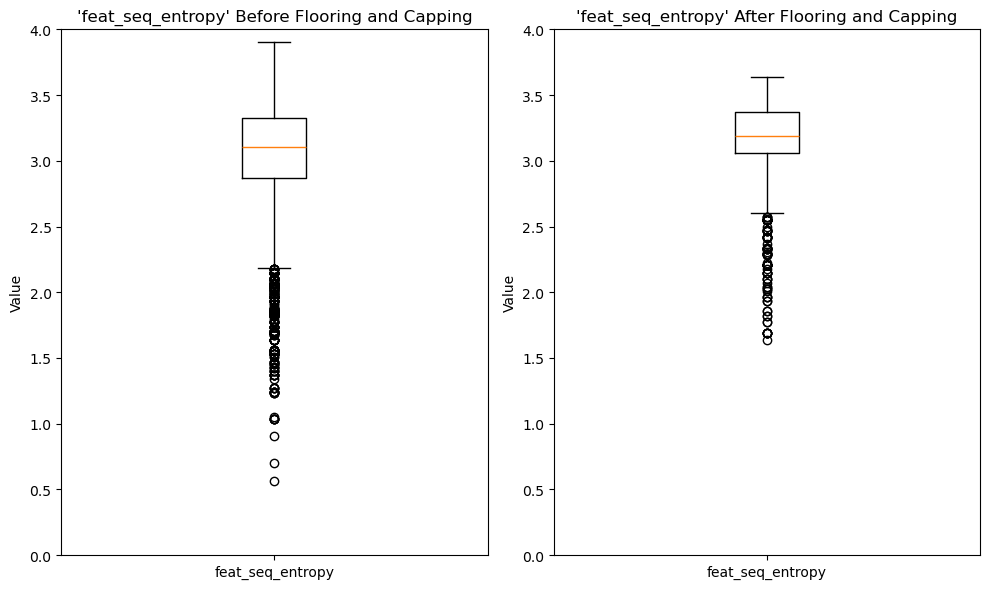

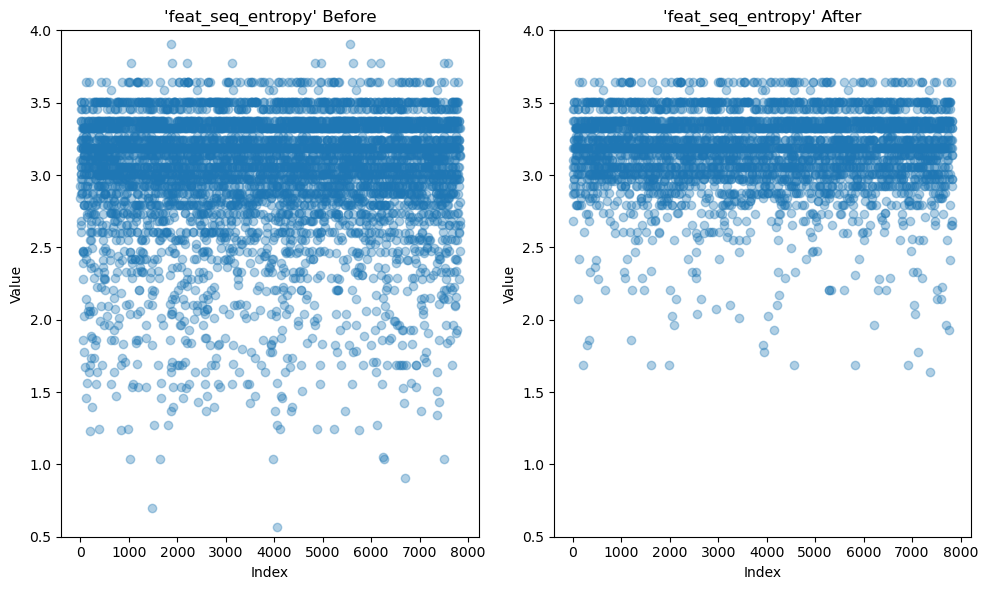

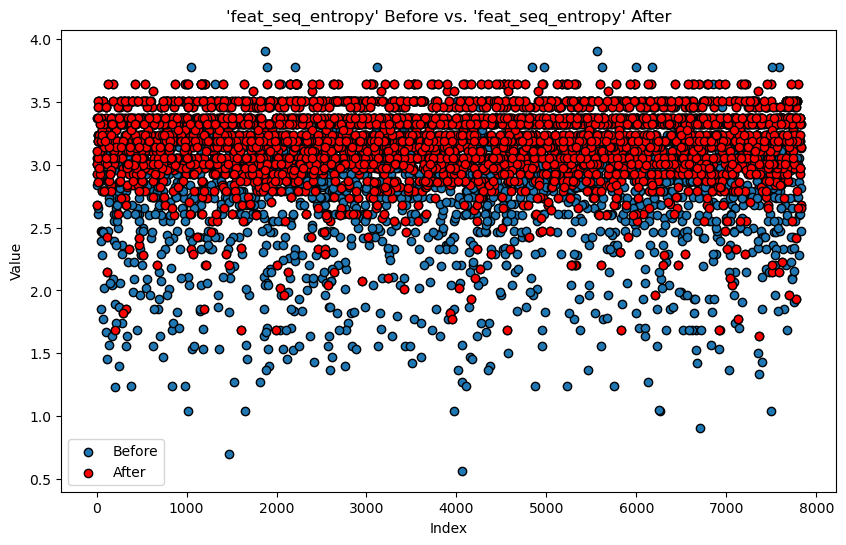

In [23]:
# Plot boxplots for 'feat_seq_entropy' before and after flooring and capping
plt.figure(figsize=(10, 6))

# Boxplot before flooring and capping
plt.subplot(1, 2, 1)
plt.boxplot([X_train['feat_seq_entropy']], labels=['feat_seq_entropy'])
plt.title("'feat_seq_entropy' Before Flooring and Capping")
plt.ylabel('Value')
plt.ylim(0, 4)

# Boxplot after flooring and capping
plt.subplot(1, 2, 2)
plt.boxplot([X_train_wo_outlier['feat_seq_entropy']], labels=['feat_seq_entropy'])
plt.title("'feat_seq_entropy' After Flooring and Capping")
plt.ylabel('Value')
plt.ylim(0, 4)

plt.tight_layout()
plt.show()

# Plot scatter plots for 'feat_seq_entropy' before and after flooring and capping
plt.figure(figsize=(10, 6))

# Scatter plot before flooring and capping
plt.subplot(1, 2, 1)
plt.scatter(X_train.index, X_train['feat_seq_entropy'], alpha=0.35)
plt.title("'feat_seq_entropy' Before")
plt.xlabel('Index')
plt.ylabel('Value')
plt.ylim(0.5, 4)

# Scatter plot after flooring and capping
plt.subplot(1, 2, 2)
plt.scatter(X_train_wo_outlier.index, X_train_wo_outlier['feat_seq_entropy'], alpha=0.35)
plt.title("'feat_seq_entropy' After")
plt.xlabel('Index')
plt.ylabel('Value')
plt.ylim(0.5, 4)

plt.tight_layout()
plt.show()

# Plot a combined scatter plot to compare 'feat_seq_entropy' before and after flooring and capping
plt.figure(figsize=(10, 6))

# Scatter plot before flooring and capping
plt.scatter(X_train.index, X_train['feat_seq_entropy'], edgecolor = 'k', label='Before')


# Scatter plot after flooring and capping
plt.scatter(X_train_wo_outlier.index, X_train_wo_outlier['feat_seq_entropy'], color='red', edgecolor = 'k', label='After')
plt.xlabel('Index')
plt.ylabel('Value')

plt.title("'feat_seq_entropy' Before vs. 'feat_seq_entropy' After")
plt.legend(loc='lower left')
plt.show();

- First Figure (Boxplots):
    - The boxplot on the right shows that the flooring and capping successfully reduced outliers in 'feat_seq_entropy', as the extreme values below 2.0 are no longer present

- Second Figure (Scatter Plots Before and After):
    - The scatter plot on the right shows that flooring and capping effectively reduced outliers, as the values are more confined and the extreme points have been capped.

- Third Figure (Combined Scatter Plot):
    - The combined scatter plot shows that flooring and capping worked to reduce outliers, as the red points (after capping) are more consistent and fewer extreme values are present compared to the blue points (before capping).

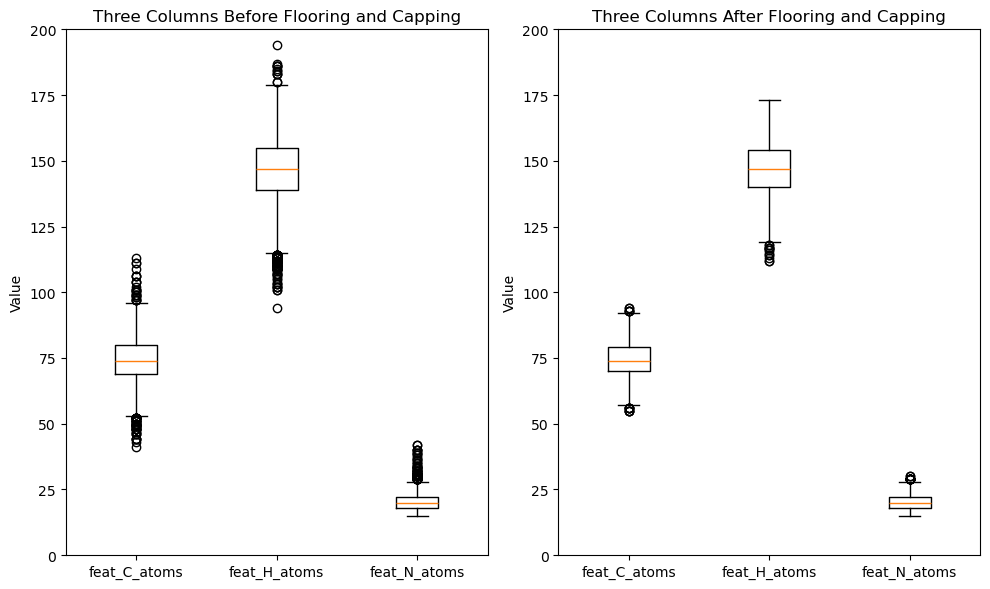

In [24]:
# Plot boxplots for the three columns before and after flooring and capping
plt.figure(figsize=(10, 6))

# Boxplots before flooring and capping
plt.subplot(1, 2, 1)
plt.boxplot([X_train['feat_C_atoms'], X_train['feat_H_atoms'], X_train['feat_N_atoms']], labels=['feat_C_atoms', 'feat_H_atoms', 'feat_N_atoms'])
plt.title('Three Columns Before Flooring and Capping')
plt.ylabel('Value')
plt.ylim(0, 200)

# Boxplots after flooring and capping
plt.subplot(1, 2, 2)
plt.boxplot([X_train_wo_outlier['feat_C_atoms'], X_train_wo_outlier['feat_H_atoms'], X_train_wo_outlier['feat_N_atoms']], labels=['feat_C_atoms', 'feat_H_atoms', 'feat_N_atoms'])
plt.title('Three Columns After Flooring and Capping')
plt.ylabel('Value')
plt.ylim(0, 200)

plt.tight_layout()
plt.show()

- The figure shows boxplots for three columns before and after applying flooring and capping
- Overall, the method effectively minimized the outliers in all three columns

In [25]:
# Apply the same treatment to the test set using the training set bounds
outliers_count_test = pd.Series(0, index=X_test.index)

# List of columns
columns = X_test.columns

for column in columns:
    outliers_count_test += (X_test[column] < lower_bounds[column]) | (X_test[column] > upper_bounds[column])

# Use the same threshold for the test set
X_test_wo_outlier = X_test[outliers_count_test < threshold]
y_test_wo_outlier = y_test[outliers_count_test < threshold]

print("The shape of X_test:", X_test.shape)
print("The shape of y_test:", y_test.shape)
print("The shape of X_test_wo_outlier:", X_test_wo_outlier.shape)
print("The shape of y_test_wo_outlier:", y_test_wo_outlier.shape)

The shape of X_test: (2350, 102)
The shape of y_test: (2350,)
The shape of X_test_wo_outlier: (1523, 102)
The shape of y_test_wo_outlier: (1523,)


### Handling missing values

Given the relatively low percentage of missing values, we opted for simple row deletion. More advanced imputation techniques such as mean, median, or model-based imputation were considered [6].

In [26]:
def handle_missing_values(X_df, y_df, missing_threshold=0.5):
    
    # Drop rows where the target column has missing values
    non_missing_y_indices = y_df.dropna().index
    X_df = X_df.loc[non_missing_y_indices]
    y_df = y_df.loc[non_missing_y_indices]

    # Drop columns with more than the threshold percentage of missing values
    X_df = X_df.dropna(axis=1, thresh=(1 - missing_threshold)*len(X_df))

    # Drop rows with more than the threshold percentage of missing values
    non_missing_X_indices = X_df.dropna(axis=0, thresh=(1 - missing_threshold) * len(X_df.columns)).index
    X_df = X_df.loc[non_missing_X_indices]
    y_df = y_df.loc[non_missing_X_indices]
    
    # Fill missing values with the mean for all columns
    X_df = X_df.fillna(X_df.mean())

    # Display cleaned missing values information
    cleaned_missing_values_X = X_df.isnull().sum().sort_values(ascending=False)
    cleaned_missing_values_y = y.isnull().sum()
    
    print(f'Missing Values After Cleaning:\n{cleaned_missing_values_X}\nClass\t\t{cleaned_missing_values_y}')
    print(f'The number of missing values: {X.isnull().sum().sum() + y.isnull().sum()}\n\n')
    
    return X_df, y_df
    
X_train_cleaned, y_train_cleaned = handle_missing_values(X_train_wo_outlier, y_train_wo_outlier)
X_test_cleaned, y_test_cleaned = handle_missing_values(X_test_wo_outlier, y_test_wo_outlier)


Missing Values After Cleaning:
feat_seq_entropy    0
feat_ST4            0
feat_BLOSUM6        0
feat_BLOSUM5        0
feat_BLOSUM4        0
                   ..
feat_Z3             0
feat_Z2             0
feat_Z1             0
feat_KF10           0
feat_Perc_Y         0
Length: 102, dtype: int64
Class		0
The number of missing values: 0


Missing Values After Cleaning:
feat_seq_entropy    0
feat_ST4            0
feat_BLOSUM6        0
feat_BLOSUM5        0
feat_BLOSUM4        0
                   ..
feat_Z3             0
feat_Z2             0
feat_Z1             0
feat_KF10           0
feat_Perc_Y         0
Length: 102, dtype: int64
Class		0
The number of missing values: 0




- The provided code cleans the DataFrame by dropping rows with missing values in the 'Class' column, removing columns and rows with more than 50% missing values, filling remaining missing values with column means (except for 'Class'), and results in a DataFrame with no missing values.

### Scaling features

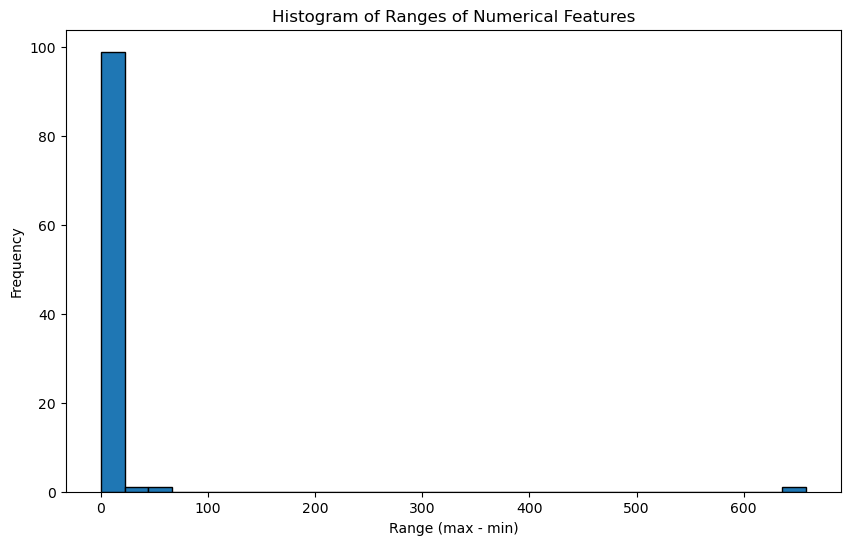

In [27]:
# Check the scale of numerical features

# Calculate minima and maxima
minima = X_train_cleaned.min()
maxima = X_train_cleaned.max()

# Calculate ranges
ranges = maxima - minima

# Plot histogram of ranges
plt.figure(figsize=(10, 6))
plt.hist(ranges, bins=30, edgecolor='k')
plt.xlabel('Range (max - min)')
plt.ylabel('Frequency')
plt.title('Histogram of Ranges of Numerical Features')
plt.show()

In [28]:
# Scaling features

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform training data
X_train_scaled = scaler.fit_transform(X_train_cleaned)

# Convert the scaled data back to DataFrame for easy visualization and handling
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train_cleaned.index, columns=X_train_cleaned.columns)

# Transform test data
X_test_scaled = scaler.transform(X_test_cleaned)

# Convert the scaled data back to DataFrame for easy visualization and handling
X_test_scaled_df = pd.DataFrame(X_test_scaled, index=X_test_cleaned.index, columns=X_test_cleaned.columns)

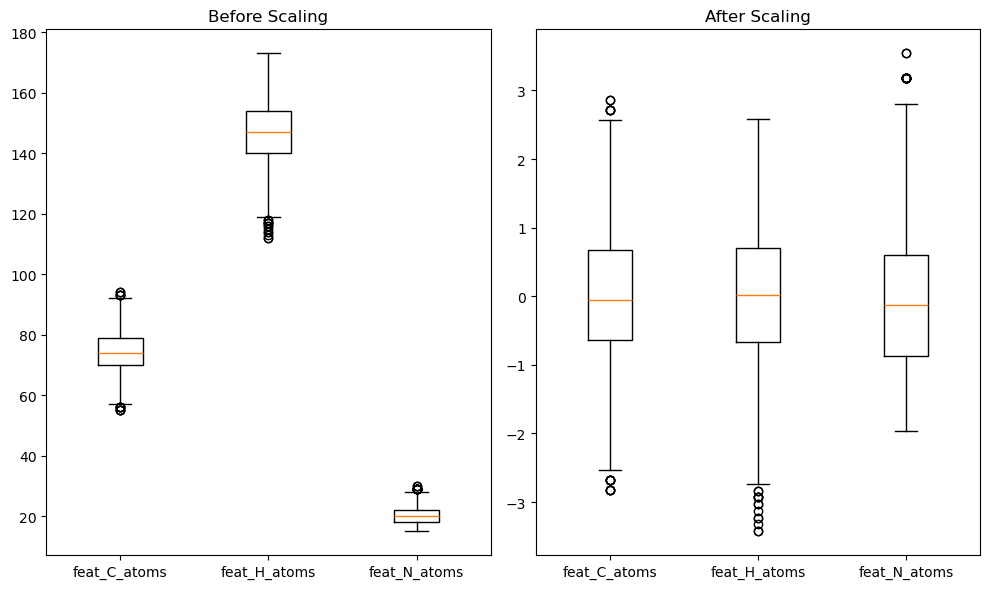

In [29]:
# Evaluate the methods
def evaluate_method(data, data_):
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.boxplot([data['feat_C_atoms'], data['feat_H_atoms'], data['feat_N_atoms']], labels=['feat_C_atoms', 'feat_H_atoms', 'feat_N_atoms'])
    plt.title('Before Scaling')
    
    plt.subplot(1, 2, 2)
    plt.boxplot([data_['feat_C_atoms'], data_['feat_H_atoms'], data_['feat_N_atoms']], labels=['feat_C_atoms', 'feat_H_atoms', 'feat_N_atoms'])
    plt.title('After Scaling')

    plt.tight_layout()
    plt.show()


evaluate_method(X_train_cleaned, X_train_scaled_df)


## 3. Feature Selection and Dimensionality Reduction

To reduce redundancy and noise, we applied correlation-based filtering, removal of low-variance features, and principal component analysis (PCA). These steps follow established feature selection and dimensionality reduction strategies [7-9], aiming to improve model performance while maintaining interpretability.

### Removing highly correlated features

In [30]:
# Calculate the correlation matrix
correlation_matrix = X_train_scaled_df.corr().abs()

# Identify highly correlated features
# Define a threshold for considering features as highly correlated
threshold = 0.9

# Create a set to hold the features to drop
correlated_features = set()

# Iterate over the columns of the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] > threshold:
            colname = correlation_matrix.columns[j]
            correlated_features.add(colname)

# Remove highly correlated features
X_train_dhcf = X_train_scaled_df.drop(columns=correlated_features)

# Remove the same highly correlated features from the test data
X_test_dhcf = X_test_scaled_df.drop(columns=correlated_features)

# Optionally, display the highly correlated pairs and the filtered DataFrame
print("Highly correlated pairs removed:")
print(correlated_features)
print("\nFiltered DataFrame shape:", X_train_dhcf.shape)

Highly correlated pairs removed:
{'feat_F2', 'feat_MSWHIM1', 'feat_KF2', 'feat_VHSE1', 'feat_ST1', 'feat_BLOSUM1', 'feat_VHSE2', 'feat_Perc_P', 'feat_PP2', 'feat_F3', 'feat_T1', 'feat_PP1', 'feat_Perc_Polar', 'feat_ProtFP2', 'feat_VHSE3'}

Filtered DataFrame shape: (3674, 87)


- The highly correlated features (15 features) were removed, resulting in a filtered DataFrame with 87 features

### Dealing with Constant Features

In [31]:
# Identify constant features (variance = 0)
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train_dhcf)

constant_columns = [column for column in X_train_dhcf.columns
                    if column not in X_train_dhcf.columns[constant_filter.get_support()]]

# Identify quasi-constant features (variance < 0.01)
qconstant_filter = VarianceThreshold(threshold=0.01)
qconstant_filter.fit(X_train_dhcf)

qconstant_columns = [column for column in X_train_dhcf.columns
                     if column not in X_train_dhcf.columns[qconstant_filter.get_support()]]

# Combine both lists of columns to drop
columns_to_drop = constant_columns + qconstant_columns

# Remove constant and quasi-constant features from the training data
X_train_filtered_df = X_train_dhcf.drop(columns=columns_to_drop)

# Remove constant and quasi-constant features from the test data
X_test_filtered_df = X_test_dhcf.drop(columns=columns_to_drop)

# Print the number of constant and quasi-constant features
print('Number of constant features: ' + str(len(constant_columns)))
print('Number of quasi-constant features: ' + str(len(qconstant_columns)))

# Optionally, display the filtered DataFrame shape
print('Filtered DataFrame shape:', X_train_filtered_df.shape)

Number of constant features: 0
Number of quasi-constant features: 0
Filtered DataFrame shape: (3674, 87)


### Removing duplicate data

In [32]:
def remove_duplicates(features_df, target_df):
    
    # Check for duplicate data
    duplicates = features_df.duplicated()

    # Count the number of duplicate rows
    num_duplicates = duplicates.sum()

    # Display the number of rows before removing duplicates
    print(f"Before removing duplicates, the DataFrame has {features_df.shape[0]} rows.")

    # Display the result of the check
    if num_duplicates > 0:
        print(f"There are {num_duplicates} duplicated rows in the DataFrame.")
    
        # Remove duplicate data
        features_df_no_duplicates = features_df.drop_duplicates()
        # Get the indices of the remaining rows
        remaining_indices = features_df_no_duplicates.index
        # Filter the target DataFrame to match the remaining rows
        target_df_no_duplicates = target_df.loc[remaining_indices]
        
        print(f"After removing duplicates, the DataFrame has {features_df_no_duplicates.shape[0]} rows.")
    else:
        features_df_no_duplicates = features_df
        target_df_no_duplicates = target_df
        print("There are no duplicated rows in the DataFrame.")
    
    # Print the shapes of the resulting DataFrame
    print('Filtered Features DataFrame shape:', features_df_no_duplicates.shape)
    print('Filtered Target DataFrame shape:', target_df_no_duplicates.shape)
    
    return features_df_no_duplicates, target_df_no_duplicates

X_train_no_duplicates_df, y_train_no_duplicates_df = remove_duplicates(X_train_filtered_df, y_train_cleaned)
print('\n')
X_test_no_duplicates_df, y_test_no_duplicates_df = remove_duplicates(X_test_filtered_df, y_test_cleaned)


Before removing duplicates, the DataFrame has 3674 rows.
There are 228 duplicated rows in the DataFrame.
After removing duplicates, the DataFrame has 3446 rows.
Filtered Features DataFrame shape: (3446, 87)
Filtered Target DataFrame shape: (3446,)


Before removing duplicates, the DataFrame has 1523 rows.
There are 45 duplicated rows in the DataFrame.
After removing duplicates, the DataFrame has 1478 rows.
Filtered Features DataFrame shape: (1478, 87)
Filtered Target DataFrame shape: (1478,)


### Feature reduction using PCA

In [33]:
# Prepare the data
X_pca = X_train_no_duplicates_df.values
X_pca_test = X_test_no_duplicates_df.values

# Apply PCA to the data
pca = PCA(n_components=X_pca.shape[1])  # Number of components = number of features
pca.fit(X_pca)

# Determine the number of components to explain 95% of the variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Find the number of components needed to explain 95% variance
num_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1

# Find the number of components needed to explain 80% variance
num_components_80 = np.argmax(cumulative_explained_variance >= 0.8) + 1

print(f'Number of components needed to explain 95% of the variance: {num_components_95}')
print(f'Number of components needed to explain 80% of the variance: {num_components_80}')

Number of components needed to explain 95% of the variance: 17
Number of components needed to explain 80% of the variance: 10


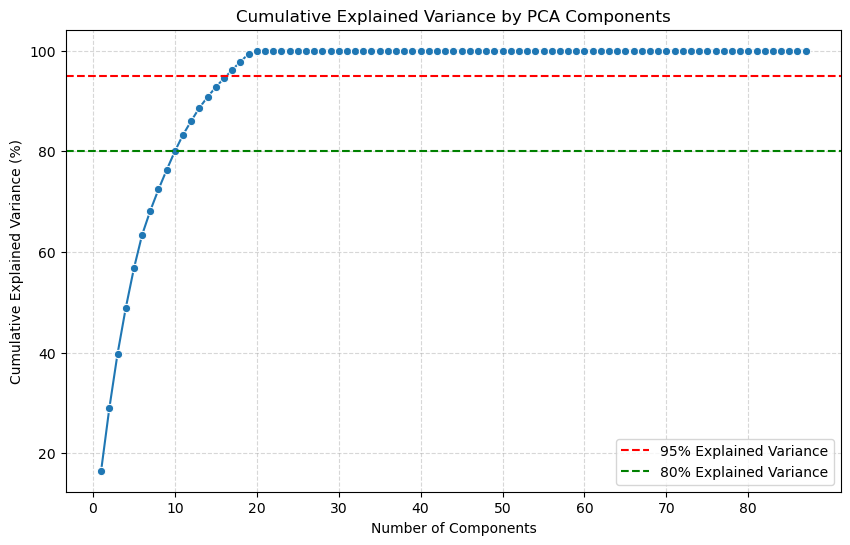

In [34]:
# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, len(cumulative_explained_variance) + 1), y=cumulative_explained_variance * 100, marker='o')
plt.axhline(y=95, color='r', linestyle='--', label='95% Explained Variance')
plt.axhline(y=80, color='g', linestyle='--', label='80% Explained Variance')
plt.xticks(np.arange(0, len(cumulative_explained_variance) + 1, 10))
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.grid(linestyle='--', alpha=0.5)
plt.legend(loc='lower right')
plt.show()

In [35]:
# Transform the data using the determined number of components
pca = PCA(n_components=num_components_80)
X_reduced = pca.fit_transform(X_pca)

# Transform the test data using the same PCA model
X_test_reduced = pca.transform(X_pca_test)

# Save the transformed features into a DataFrame
X_train_selected_df = pd.DataFrame(X_reduced, index=X_train_no_duplicates_df.index, columns=[f"PC{i+1}" for i in range(X_reduced.shape[1])])
X_test_selected_df = pd.DataFrame(X_test_reduced, index=X_test_no_duplicates_df.index, columns=[f"PC{i+1}" for i in range(X_test_reduced.shape[1])])

print(f'Reduced DataFrame shape: {X_train_selected_df.shape}\n')
print(X_train_selected_df.head())

Reduced DataFrame shape: (3446, 10)

           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
3527 -7.794906 -3.412821  1.468585  0.092446 -0.856492 -1.960631 -1.339217   
577   0.937487 -3.593570 -3.222432 -2.983172  2.044790  0.381926 -0.570519   
5289 -7.377933  1.728477  1.426777 -0.510061  1.577469  1.090553 -2.504407   
2257 -6.306536  2.817637  0.480321  1.594312  2.663994 -1.641151 -1.203240   
3097  2.386479 -2.765012 -2.605625  1.098431  0.169870 -1.135013 -2.674225   

           PC8       PC9      PC10  
3527  0.961128  4.057434 -0.003978  
577   1.510993  0.939353  2.060965  
5289  2.972252 -1.199433 -4.000082  
2257  0.231255  2.308391  0.979237  
3097  0.195744  1.474533 -1.969438  


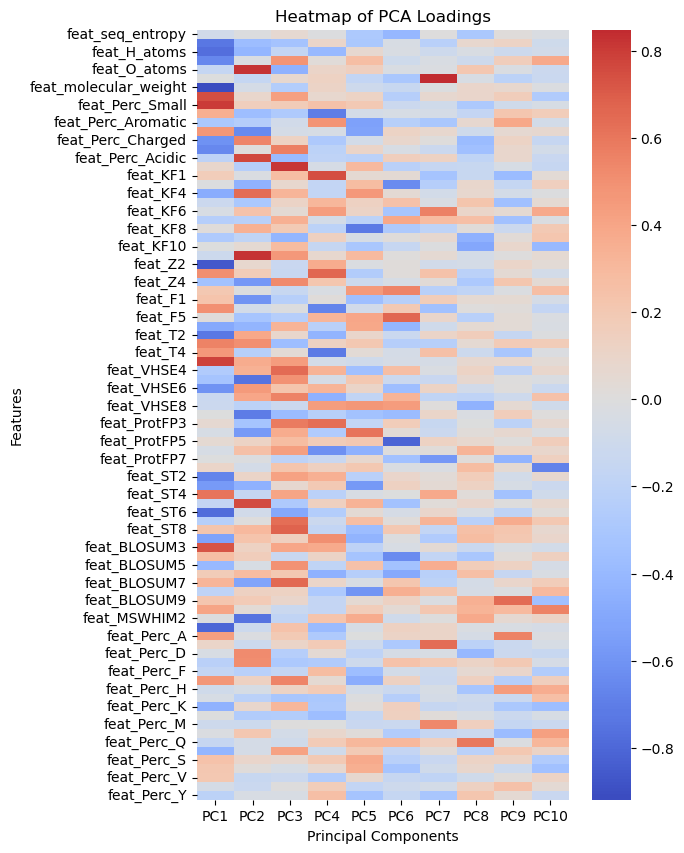

In [36]:
# Calculate loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame for the loadings
loadings_df = pd.DataFrame(loadings, index=X_train_no_duplicates_df.columns, columns=[f'PC{i+1}' for i in range(num_components_80)])

plt.figure(figsize=(6, 10))
sns.heatmap(loadings_df, cmap='coolwarm', center=0)
plt.title('Heatmap of PCA Loadings')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.show()

- The heatmap of PCA loadings shows the correlation between the original features and the principal components
- Red indicates a strong positive loading, while blue indicates a strong negative loading, highlighting which features contribute most to each principal component
- Based on the heatmap, it appears that PCA worked effectively
- The distinct patterns of correlation between the original features and the principal components, with clear positive and negative loadings, indicate that the principal components are successfully capturing the variance in the data

## 4. Handling Class Imbalance

The dataset is significantly imbalanced. We apply **SMOTE (Synthetic Minority Over-sampling Technique)** to oversample the minority class and ensure better generalization of our models [10]. Alternative strategies such as cost-sensitive learning were also considered [11], but not implemented due to pipeline simplicity.

In [37]:
# Deal with Class Imbalance using SMOTE

smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train_selected_df, y_train_no_duplicates_df)

print("\nClass distribution before SMOTE:")
print(y_train_no_duplicates_df.value_counts())

print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())


Class distribution before SMOTE:
Class
Negative    2344
Positive    1102
Name: count, dtype: int64

Class distribution after SMOTE:
Class
Negative    2344
Positive    2344
Name: count, dtype: int64


In [38]:
def evaluate_model(X_train, y_train, X_test, y_test, model, state):
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')
    test_mcc = matthews_corrcoef(y_test, y_pred_test)
    
    print(f"Performance {state} SMOTE:")
    print(f"Test F1 Score: {test_f1}, Test MCC: {test_mcc}")

# Evaluate models
clf = RandomForestClassifier(random_state=0)

# Original Data
evaluate_model(X_train_selected_df, y_train_no_duplicates_df, X_test_selected_df, y_test_no_duplicates_df, clf, 'before')

# SMOTE Data
evaluate_model(X_train_smote, y_train_smote, X_test_selected_df, y_test_no_duplicates_df, clf, 'after')


Performance before SMOTE:
Test F1 Score: 0.6386742887819897, Test MCC: 0.17527042990944885
Performance after SMOTE:
Test F1 Score: 0.6510591643414126, Test MCC: 0.18317259551052834


- Applying SMOTE improved the model's performance, as evidenced by an increase in the Test F1 Score from 0.638 to 0.653 and the Test MCC from 0.178 to 0.188

In [39]:
# Encode the labels as binary values
label_encoder = LabelEncoder()
y_train_smote_encoded = label_encoder.fit_transform(y_train_smote)
y_test_encoded = label_encoder.transform(y_test_no_duplicates_df)


In [40]:
# Print the classes of the encoder
print("Classes of the encoder:", label_encoder.classes_)
print('Codierung: Negative=0, Positive=1')

Classes of the encoder: ['Negative' 'Positive']
Codierung: Negative=0, Positive=1


In [41]:
# Assign the final training set
X_train_final = X_train_smote
y_train_final = y_train_smote_encoded

# Assign the final test set
X_test_final = X_test_selected_df
y_test_final = y_test_encoded

In [42]:
print(X_train_final.shape)
print(y_train_final.shape)
print(X_test_final.shape)
print(y_test_final.shape)

(4688, 10)
(4688,)
(1478, 10)
(1478,)


## 5. Model Training and Evaluation

We train several machine learning classifiers and evaluate them using F1-score, Matthews Correlation Coefficient (MCC), and Area Under the Curve (AUC) on the test set.

In [43]:
# Models to evaluate
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(random_state=0),
    'SVM': SVC(probability=True, random_state=0),
    'Neural Network': MLPClassifier(random_state=0),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(random_state=0),
    'KNN': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(random_state=0),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0),
    'Gradient Boosting': GradientBoostingClassifier(random_state=0)
}

In [44]:
# Store results
results = []

# Evaluate each model
for name, model in models.items():
    model.fit(X_train_final, y_train_final)
    y_pred_train = model.predict(X_train_final)
    y_prob_train = model.predict_proba(X_train_final)[:, 1]
    y_pred_test = model.predict(X_test_final)
    y_prob_test = model.predict_proba(X_test_final)[:, 1]

    train_f1 = f1_score(y_train_final, y_pred_train, average='weighted')
    test_f1 = f1_score(y_test_final, y_pred_test, average='weighted')
    train_mcc = matthews_corrcoef(y_train_final, y_pred_train)
    test_mcc = matthews_corrcoef(y_test_final, y_pred_test)
    train_auc = roc_auc_score(y_train_final, y_prob_train)
    test_auc = roc_auc_score(y_test_final, y_prob_test)
    
    results.append({
        'Model': name,
        'Train F1 Score': train_f1,
        'Test F1 Score': test_f1,
        'Train MCC': train_mcc,
        'Test MCC': test_mcc,
        'Train AUC': train_auc,
        'Test AUC': test_auc,
    })

# Create a DataFrame with the results
results_df = pd.DataFrame(results)

# Sort by 'Test AUC' in descending order
results_df = results_df.sort_values(by='Test AUC', ascending=False)

# Print the results
print(results_df)

                 Model  Train F1 Score  Test F1 Score  Train MCC  Test MCC  \
1        Random Forest        1.000000       0.651059   1.000000  0.183173   
5  Logistic Regression        0.588274       0.595081   0.176652  0.159843   
2                  SVM        0.704019       0.594377   0.415818  0.154709   
4          Naive Bayes        0.595132       0.583962   0.192165  0.152636   
8              XGBoost        0.995520       0.635868   0.991061  0.163372   
9    Gradient Boosting        0.722310       0.593071   0.450011  0.151797   
3       Neural Network        0.782065       0.610338   0.565173  0.126955   
7             AdaBoost        0.638728       0.588990   0.278698  0.135723   
6                  KNN        0.816946       0.586491   0.653890  0.117269   
0        Decision Tree        1.000000       0.606081   1.000000  0.112839   

   Train AUC  Test AUC  
1   1.000000  0.648555  
5   0.623368  0.629895  
2   0.790491  0.623547  
4   0.636203  0.617773  
8   0.999936  0.

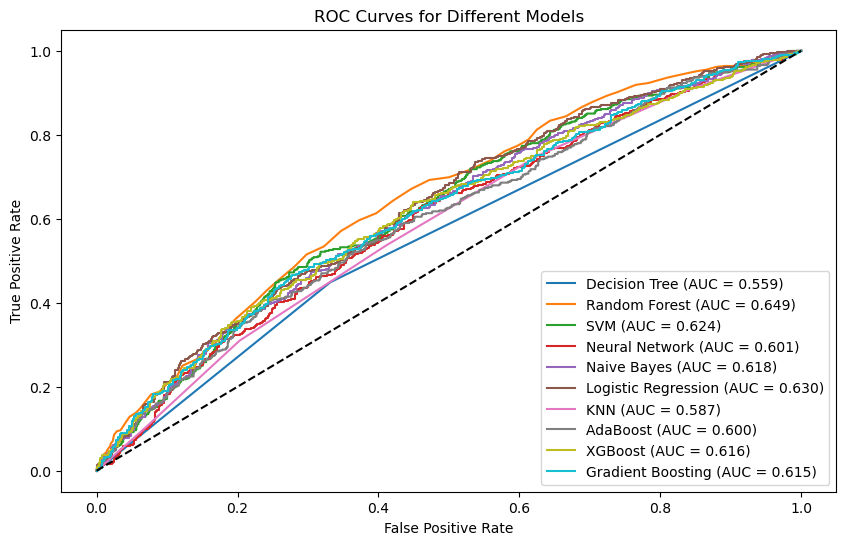

In [45]:
# Plot the ROC curves for all models
plt.figure(figsize=(10, 6))
for name, model in models.items():
    y_prob_test = model.predict_proba(X_test_final)[:, 1]
    fpr, tpr, _ = roc_curve(y_test_final, y_prob_test)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test_final, y_prob_test):.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.show()

- The ROC curve plot visually compares the performance of different models based on their AUC values

### Hyperparameter Tuning

To improve model performance, we apply `RandomizedSearchCV` for hyperparameter tuning on the Random Forest classifier. We perform both broad search (exploration) and fine-grained tuning (exploitation) [12-15].

In [46]:
# Exploration

# Define model
rf = RandomForestClassifier(random_state=0)

# Define evaluation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
# skf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)

# Define search space
space = {
    'n_estimators': [400, 500, 600],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 5],
}

# Define GridSearchCV
search_rf = RandomizedSearchCV(rf, space, n_iter=100, scoring='roc_auc', n_jobs=-1, cv=skf, random_state=0)

# Execute GridSearchCV
search_rf.fit(X_train_final, y_train_final.ravel())

# Best parameters and score
print(f"Best Hyperparameters: {search_rf.best_params_}")

# Evaluate the best model
best_rf = search_rf.best_estimator_
best_rf.fit(X_train_final, y_train_final)
y_prob_test_rf = best_rf.predict_proba(X_test_final)[:, 1]
auc_rf = roc_auc_score(y_test_final, y_prob_test_rf)

print(f"Best Random Forest Test AUC: {auc_rf}")

Best Hyperparameters: {'n_estimators': 600, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Best Random Forest Test AUC: 0.6542058051959042


In [47]:
# Exploitation

# Define model
rf = RandomForestClassifier(random_state=0)

# Define evaluation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
# skf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)

# Define search space
space = {
    'n_estimators': [585, 600, 615],
    'max_features': ['sqrt'],
    'max_depth': [None],
    'min_samples_split': [3],
    'min_samples_leaf': [1],
}

# Define GridSearchCV
search_rf = RandomizedSearchCV(rf, space, n_iter=100, scoring='roc_auc', n_jobs=-1, cv=skf, random_state=0)

# Execute GridSearchCV
search_rf.fit(X_train_final, y_train_final.ravel())

# Best parameters and score
print(f"Best Hyperparameters: {search_rf.best_params_}")
print(f"Best AUC: {search_rf.best_score_}")


Best Hyperparameters: {'n_estimators': 585, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Best AUC: 0.8542365744820737


In [48]:
# Evaluate the best model
best_rf = search_rf.best_estimator_
best_rf.fit(X_train_final, y_train_final)
y_prob_test_rf = best_rf.predict_proba(X_test_final)[:, 1]
auc_rf = roc_auc_score(y_test_final, y_prob_test_rf)

print(f"Best Random Forest Test AUC: {auc_rf}")

Best Random Forest Test AUC: 0.6547664381822798


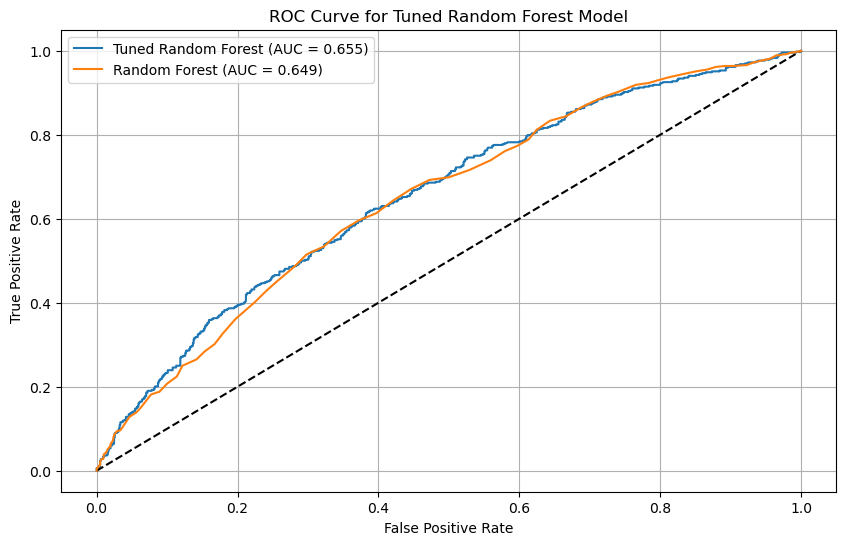

In [49]:
# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_final, y_prob_test_rf)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Tuned Random Forest (AUC = {auc_rf:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tuned Random Forest Model')
# plt.legend()
plt.grid()

model_rf_ = RandomForestClassifier(random_state=0)
model_rf_.fit(X_train_final, y_train_final)
y_prob_test_rf_ = model_rf_.predict_proba(X_test_final)[:, 1]
fpr_, tpr_, __ = roc_curve(y_test_final, y_prob_test_rf_)
plt.plot(fpr_, tpr_, label=f'Random Forest (AUC = {roc_auc_score(y_test_final, y_prob_test_rf_):.3f})')
plt.legend()
plt.show()

## 6. Final Pipeline

We consolidate all preprocessing, feature engineering, and modeling steps into a single scikit-learn pipeline [16]. This makes the process reproducible and modular.

Custom transformers were implemented for:
- Quantile-based outlier filtering
- Missing value handling
- Removal of highly correlated features
- Duplicate detection
- SMOTE balancing

The final pipeline uses the best Random Forest model from hyperparameter tuning.

In [50]:
# Custom transformer for quantile-based flooring and capping
class QuantileFilter(BaseEstimator, TransformerMixin):
    def __init__(self, low_quantile=0.01, high_quantile=0.99):
        self.low_quantile = low_quantile
        self.high_quantile = high_quantile

    def fit(self, X, y=None):
        self.low = X.quantile(self.low_quantile)
        self.high = X.quantile(self.high_quantile)
        return self

    def transform(self, X, y=None):
        condition = ~((X < self.low) | (X > self.high)).any(axis=1)
        self.condition = condition
        return X[condition].reset_index(drop=True)

    def fit_transform(self, X, y=None, **fit_params):
        self.fit(X, y)
        return self.transform(X, y)
    
    def transform_y(self, y):
        return y[self.condition].reset_index(drop=True)

# Custom transformer for removing missing values
class RemoveMissingValues(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        if y is not None:
            # Combine X and y to ensure we are removing rows with missing values considering both
            combined = pd.concat([pd.DataFrame(X), pd.Series(y, name='Class')], axis=1)
            self.condition = ~combined.isnull().any(axis=1)
            return pd.DataFrame(X)[self.condition].reset_index(drop=True)
        else:
            return pd.DataFrame(X).dropna().reset_index(drop=True)

    def fit_transform(self, X, y=None, **fit_params):
        return self.transform(X, y)
    
    def transform_y(self, y):
        return y[self.condition].reset_index(drop=True)

# Custom transformer for removing highly correlated features
class RemoveHighlyCorrelatedFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.9):
        self.threshold = threshold

    def fit(self, X, y=None):
        corr_matrix = pd.DataFrame(X).corr().abs()
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        self.to_drop = [column for column in upper.columns if any(upper[column] > self.threshold)]
        return self

    def transform(self, X, y=None):
        return pd.DataFrame(X).drop(columns=self.to_drop).reset_index(drop=True)

# Custom transformer for removing duplicates
class RemoveDuplicates(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        self.condition = ~pd.DataFrame(X).duplicated()
        return pd.DataFrame(X)[self.condition].reset_index(drop=True)

    def fit_transform(self, X, y=None, **fit_params):
        return self.transform(X, y)
    
    def transform_y(self, y):
        return y[self.condition].reset_index(drop=True)

# Custom transformer for Handling class imbalance with SMOTE
class ConditionalSMOTE(BaseEstimator, TransformerMixin):
    def __init__(self, apply_smote=True):
        self.apply_smote = apply_smote
        self.smote = SMOTE(random_state=42)
    
    def fit_resample(self, X, y):
        if self.apply_smote:
            return self.smote.fit_resample(X, y)
        else:
            return X, y
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X

# Custom transformer for Encoding labels
class LabelEncoderTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.label_encoder = LabelEncoder()
        self.label_encoder.fit(y)
        return self

    def transform(self, X, y=None):
        return self.label_encoder.transform(y)

    def fit_transform(self, X, y=None, **fit_params):
        self.fit(X, y)
        return self.transform(X, y)

# Define the final model
final_model = RandomForestClassifier(
    n_estimators=585,
    min_samples_split=3,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=None,
    random_state=0
)

In [51]:
# Create the pipeline
pipeline = Pipeline([
    ('quantile_filter', QuantileFilter(low_quantile=0.01, high_quantile=0.99)),
    ('remove_missing_values', RemoveMissingValues()),
    ('scaler', StandardScaler()),
    ('remove_highly_correlated', RemoveHighlyCorrelatedFeatures(threshold=0.9)),
    ('variance_threshold', VarianceThreshold(threshold=0.01)),
    ('remove_duplicates', RemoveDuplicates()),
    ('pca', PCA(n_components=0.8, svd_solver='full')),
    ('smote', SMOTE(random_state=0)),
    ('label_encoder', LabelEncoderTransformer()),
    ('final_model', final_model)
])

### Evaluation on test set

We evaluate the final pipeline using the hold-out test set.

In [52]:
# Split the data: 70% for training, 30% for testing
X = df.drop(columns='Class')
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [53]:
# Fit and transform the pipeline on X_train and y_train
def fit_transform_pipeline(pipeline, X_train, y_train):
    X_train_filtered = X_train.copy()
    y_train_filtered = y_train.copy()
    for name, transformer in pipeline.steps:
        if name == 'smote':
            X_train_filtered, y_train_filtered = transformer.fit_resample(X_train_filtered, y_train_filtered)
        elif name == 'label_encoder':
            y_train_filtered = transformer.fit_transform(X_train_filtered, y_train_filtered)
        elif name == 'final_model':
            transformer.fit(X_train_filtered, y_train_filtered)
        else:
            X_train_filtered = transformer.fit_transform(X_train_filtered, y_train_filtered)
            if hasattr(transformer, 'condition'):
                y_train_filtered = transformer.transform_y(y_train_filtered)
    return X_train_filtered, y_train_filtered

X_train_filtered, y_train_filtered = fit_transform_pipeline(pipeline, X_train, y_train)

In [54]:
# Transform the pipeline on the test set
def transform_and_evaluate_pipeline(pipeline, X_test, y_test):
    X_test_filtered = X_test.copy()
    y_test_filtered = y_test.copy()
    for name, transformer in pipeline.steps:
        if name == 'smote':
            continue  # Skip SMOTE for test data
        elif name == 'label_encoder':
            y_test_filtered = transformer.transform(X_test_filtered, y_test_filtered)
        elif name == 'final_model':
            y_pred_test = final_model.predict(X_test_filtered)
            y_prob_test = transformer.predict_proba(X_test_filtered)[:, 1]
            auc = roc_auc_score(y_test_filtered, y_prob_test)
            test_f1 = f1_score(y_test_filtered, y_pred_test, average='weighted')
            test_mcc = matthews_corrcoef(y_test_filtered, y_pred_test)
            print(f"AUC: {auc}")
            print(f"F1 Score: {test_f1}")
            print(f"MCC: {test_mcc}")
        else:
            X_test_filtered = transformer.transform(X_test_filtered)
            if hasattr(transformer, 'condition'):
                y_test_filtered = y_test_filtered[transformer.condition].reset_index(drop=True)

transform_and_evaluate_pipeline(pipeline, X_test, y_test)

AUC: 0.6547664381822798
F1 Score: 0.6647322420506425
MCC: 0.21610237466321106


The final performance metrics are:

- **AUC**: 0.655
- **F1 Score**: 0.663
- **MCC**: 0.213

These results confirm that the pipeline generalizes well and is robust in handling class imbalance and high-dimensional data.

## Conclusion

This project demonstrates a full-cycle machine learning pipeline, including:
- Exploratory data analysis
- Preprocessing and feature selection
- Dimensionality reduction with PCA
- Class balancing using SMOTE
- Model training and tuning
- Pipeline creation with custom transformers

The final tuned Random Forest model achieved strong performance on the test set. This pipeline can be adapted to other similar binary classification problems in molecular or tabular datasets.

## References

[1] [The Data Science Process (CRISP-DM)](https://michael-fuchs-python.netlify.app/2020/08/21/the-data-science-process-crisp-dm)

[2] [Useful Exploratory Data Analysis packages in Python](https://medium.com/geekculture/useful-exploratory-data-analysis-packages-in-python-f54e14b79cc9)

[3] [Cleaning up Data from Outliers - Interquartile Range (IQR)](https://www.pluralsight.com/resources/blog/guides/cleaning-up-data-from-outliers)

[4] [Anomaly detection using Isolation Forest – A Complete Guide](https://www.analyticsvidhya.com/blog/2021/07/anomaly-detection-using-isolation-forest-a-complete-guide/)

[5] [Detecting Outliers with Angle-based Techniques in Python](https://blog.paperspace.com/outlier-detection-with-abod/)

[6] [Common methods to imputing missing data](https://www.theanalysisfactor.com/seven-ways-to-make-up-data-common-methods-to-imputing-missing-data/)

[7] [Feature Selection](https://www.kdnuggets.com/2021/06/feature-selection-overview.html)

[8] [Feature Selection Techniques in Machine Learning](https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/)

[9] [How to Choose a Feature Selection Method For Machine Learning](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)

[10] [SMOTE for Imbalanced Classification with Python](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)

[11] [Cost-Sensitive Learning for Imbalanced Classification](https://machinelearningmastery.com/cost-sensitive-learning-for-imbalanced-classification/)

[12] [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

[13] [Hyperparameter Optimization With Random Search and Grid Search](https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/)

[14] [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

[15] [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

[16] [Modeling Pipeline Optimization With scikit-learn](https://machinelearningmastery.com/modeling-pipeline-optimization-with-scikit-learn/)